In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pylab as plt
from IPython.display import display, HTML

rs = np.random.RandomState(10)

## Links

- https://seaborn.pydata.org/examples/index.html
- https://python-graph-gallery.com/all-charts/

## `DataFrame` Sample Data

`seaborn` provides some sample data from https://github.com/mwaskom/seaborn-data. They are just CSV files, and we can load them for testing using `sns.load_dataset` function. The return data type of `sns.load_dataset` is `pandas.DataFrame`.

By default, if we don't assign result to a variable, jupyter will display it out. In case we want to see content of a variable, use `IPython.display.display`.

In [22]:
# sns.load_dataset('anscombe')
# sns.load_dataset('attention')
# sns.load_dataset('brain_networks')
# sns.load_dataset('car_crashes')
# sns.load_dataset('diamonds')
# sns.load_dataset('dots')
# sns.load_dataset('exercise')
# sns.load_dataset('flights')
# sns.load_dataset('fmri')
# sns.load_dataset('gammas')
# sns.load_dataset('iris')
sns.load_dataset('mpg') # Miles Per Gallon
# sns.load_dataset('planets')
# sns.load_dataset('tips')
# sns.load_dataset('titanic')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### Constructing `DataFrame`

We can also build a `DataFrame` ourselves using a dictionary.

In [13]:
data = {'x':[1, 2, 3], 'y':[9, 8, 7]}
pd.DataFrame(data)

,x,y
0,1,9
1,2,8
2,3,7


## Plotting data

### Distribution / Histogram

Using histogram diagrams, we can visually see the value distribution of a particular metric. Take `horsepower` from `mpg` sample dataset as an example.

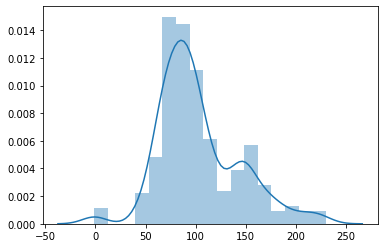

In [10]:
data = sns.load_dataset('mpg')
sns.distplot([-1 if math.isnan(n) else n for n in data['horsepower'].tolist()])

Here, most cars have power in range of 50 to 150.

We can also split and show this metric base on its `origin`.

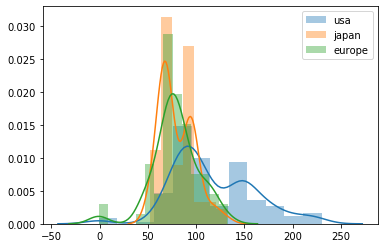

In [11]:
data = sns.load_dataset('mpg')

# Split data base on `origin`.
d = {}
for index, row in data.iterrows():
    nation = row['origin']
    if nation in d:
        d[nation].append(-1 if math.isnan(row['horsepower']) else row['horsepower'])
    else:
        d[nation] = []

# Then draw each on them on the graph.
for key in d:
    sns.distplot(d[key], label=key)
plt.legend()

Another example is `weight` metric.

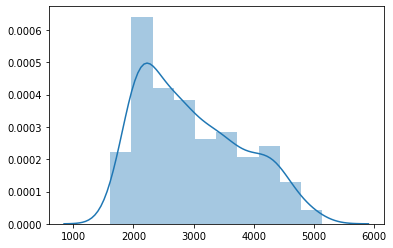

In [14]:
data = sns.load_dataset('mpg')
sns.distplot(data['weight'].tolist())

### Relationship

In all previous graphs, we only care about one metric separately. Sometimes, it's useful to know the connection/correlation between 2 parameters.

Let's plot `horsepower` and `acceleration` together and analyze them.

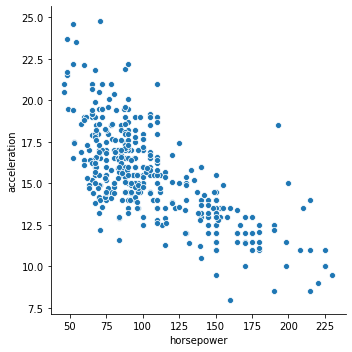

In [17]:
data = sns.load_dataset('mpg')
sns.relplot(x='horsepower', y='acceleration', data=data)

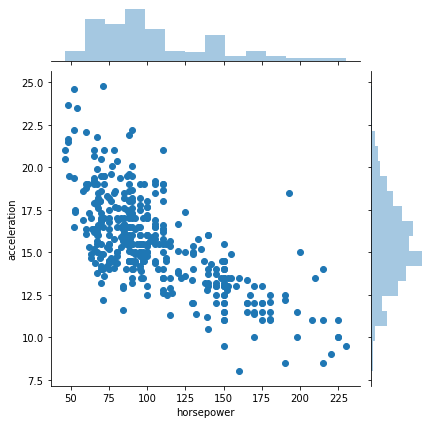

In [16]:
data = sns.load_dataset('mpg')
sns.jointplot(x='horsepower', y='acceleration', data=data)

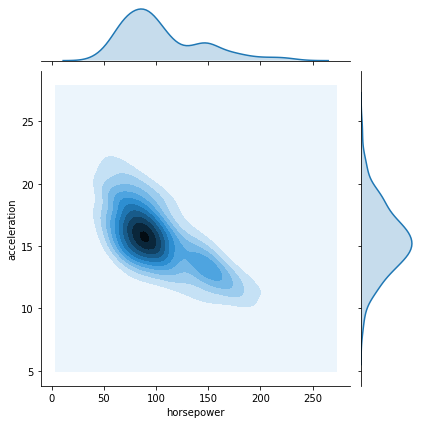

In [15]:
data = sns.load_dataset('mpg')
sns.jointplot(x='horsepower', y='acceleration', data=data, kind='kde')

Other metrics like `weight`, `horsepower` and `mpg` are worth looking at too.

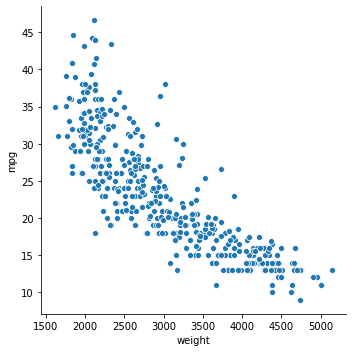

In [88]:
sns.relplot(x='weight', y='mpg', data=data)

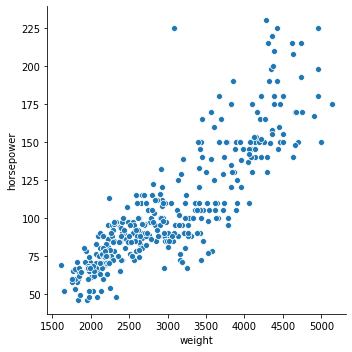

In [70]:
sns.relplot(x='weight', y='horsepower', data=data)

### Other Graph Types

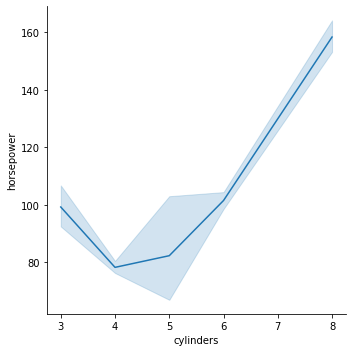

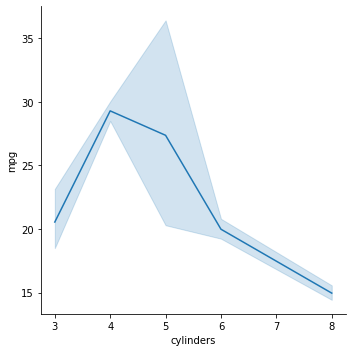

In [110]:
sns.relplot(x='cylinders', y='horsepower', kind="line", data=data)
sns.relplot(x='cylinders', y='mpg', kind="line", data=data)

The plotting below clearly shows how power is distributed by number of cylinders.

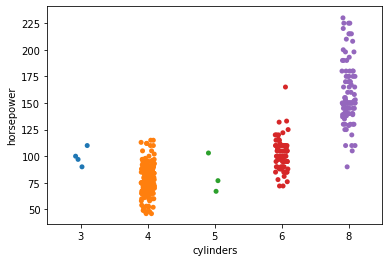

In [87]:
sns.stripplot(x="cylinders", y="horsepower", data=data, jitter=True)

Another graph that can convey the same information is violin graph.

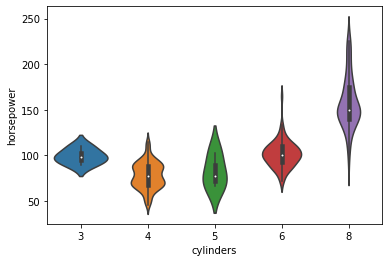

In [19]:
sns.violinplot(x="cylinders", y="horsepower", data=data)
# sns.swarmplot(x="cylinders", y="horsepower", data=data, color="white")

We may simply want to know how many cars are manufactured with a certain number of cylinders.

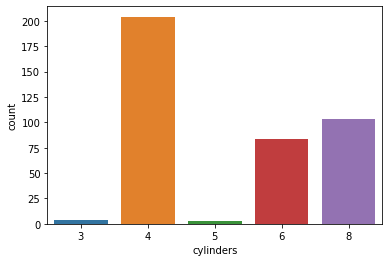

In [131]:
sns.countplot(x="cylinders", data=data)

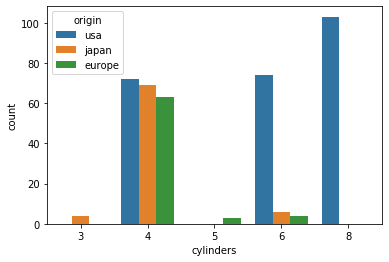

In [132]:
sns.countplot(x="cylinders", hue='origin', data=data)

All below charts show more information in one graph by utilized colors and symbols.

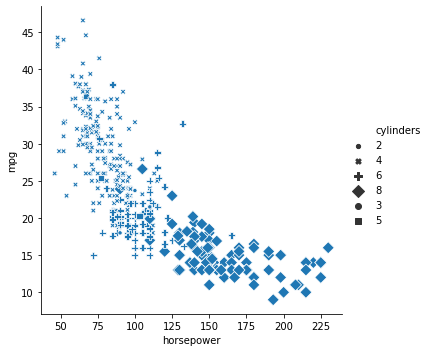

In [157]:
sns.relplot(x='horsepower', y='mpg', size='cylinders', style='cylinders', data=data)

Let's pick a random point from below chart, and we can extract 5 pieces of information:

- `mpg` -> fuel consumption
- `horsepower`
- color -> year of manufacture
- size -> weight
- shape -> number of cylinders

So, some conclusions can be drawn from looking at the whole graph:

- The more cylinders a car has, the lower the fuel efficiency, and the higher horsepower.
- 3- or 5-cylinder setting is rare.
- Most newer cars have 4 cylinders.
- 4-cylinder cars are lighter, have lower horsepower but higher fuel efficiency.

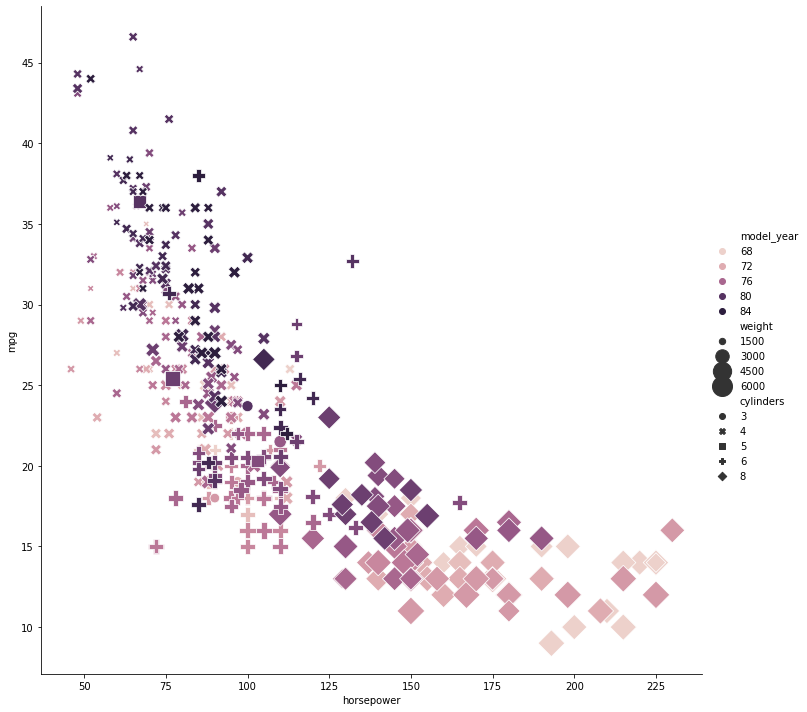

In [153]:
sns.relplot(x='horsepower', y='mpg', size='weight', hue='model_year', style='cylinders',
            height=10, sizes=(40, 400),
            data=data)

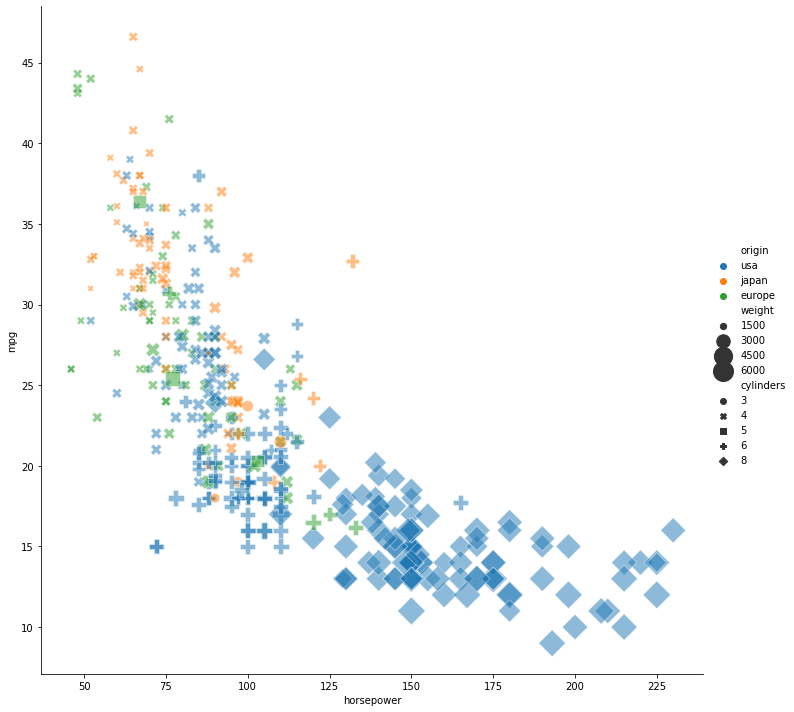

In [20]:
sns.relplot(x='horsepower', y='mpg', size='weight', hue='origin', style='cylinders',
            height=10,  sizes=(40, 400), alpha=.5,
            data=data)

Another useful graph type is heatmap. Let's use `flights` sample dataset to draw a heatmap.

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


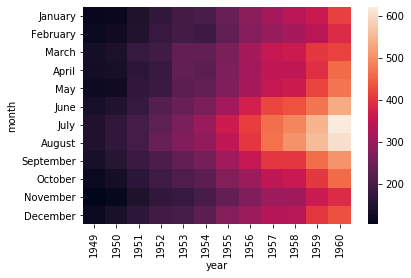

In [24]:
flights = sns.load_dataset('flights')
display(flights)

flights = flights.pivot('month', 'year', 'passengers')
display(flights)

ax = sns.heatmap(flights)